In [2]:
AminoAcid = { # maps amino acid single letter abbreviations to their full names
    'A': 'Alanine', 'C': 'Cysteine', 'D': 'Aspartic acid', 'E': 'Glutamic acid',
    'F': 'Phenylalanine', 'G': 'Glycine', 'H': 'Histidine', 'I': 'Isoleucine',
    'K': 'Lysine', 'L': 'Leucine', 'M': 'Methionine', 'N': 'Asparagine',
    'P': 'Proline', 'Q': 'Glutamine', 'R': 'Arginine', 'S': 'Serine',
    'T': 'Theronine', 'V': 'Valine', 'W': 'Tryptophan', 'Y': 'Tyrosine',
    '*': 'STOP'
}

AminoAbbrv = { # maps amino acid single letter abbreviations to three letter abbreviations
    'A': 'Ala', 'C': 'Cys', 'D': 'Asp', 'E': 'Glu',
    'F': 'Phe', 'G': 'Gly', 'H': 'His', 'I': 'Ile',
    'K': 'Lys', 'L': 'Leu', 'M': 'Met', 'N': 'Asn',
    'P': 'Pro', 'Q': 'Gln', 'R': 'Arg', 'S': 'Ser',
    'T': 'Thr', 'V': 'Val', 'W': 'Trp', 'Y': 'Tyr',
    '*': 'STP'    
}

Daltons = { # maps amino acid single letter abbreviations to their approximate molecular weight
    'A':  71, 'C': 103, 'D': 115, 'E': 129,
    'F': 147, 'G':  57, 'H': 137, 'I': 113,
    'K': 128, 'L': 113, 'M': 131, 'N': 114,
    'P':  97, 'Q': 128, 'R': 156, 'S':  87,
    'T': 101, 'V':  99, 'W': 186, 'Y': 163 
}

codon = {  # Maps a DNA triplet of nucelotides to a 1-letter Amino Acid Abbrevation 
    "AAA": 'K', "AAG": 'K', "AAC": 'N', "AAT": 'N',
    "AGA": 'R', "AGG": 'R', "AGC": 'S', "AGT": 'S',
    "ACA": 'T', "ACG": 'T', "ACC": 'T', "ACT": 'T',
    "ATA": 'I', "ATG": 'M', "ATC": 'I', "ATT": 'I',
    "GAA": 'E', "GAG": 'E', "GAC": 'D', "GAT": 'D',
    "GGA": 'G', "GGG": 'G', "GGC": 'G', "GGT": 'G',
    "GCA": 'A', "GCG": 'A', "GCC": 'A', "GCT": 'A',
    "GTA": 'V', "GTG": 'V', "GTC": 'V', "GTT": 'V',
    "CAA": 'Q', "CAG": 'Q', "CAC": 'H', "CAT": 'H',
    "CGA": 'R', "CGG": 'R', "CGC": 'R', "CGT": 'R',
    "CCA": 'P', "CCG": 'P', "CCC": 'P', "CCT": 'P',
    "CTA": 'L', "CTG": 'L', "CTC": 'L', "CTT": 'L',
    "TAA": '*', "TAG": '*', "TAC": 'Y', "TAT": 'Y',
    "TGA": '*', "TGG": 'W', "TGC": 'C', "TGT": 'C',
    "TCA": 'S', "TCG": 'S', "TCC": 'S', "TCT": 'S',
    "TTA": 'L', "TTG": 'L', "TTC": 'F', "TTT": 'F'
}

# Calculating Total Molecular Weight
- simplified integer molecular weights

In [3]:
def get_molecular_weight(peptide):
    return sum([Daltons[acid] for acid in peptide])

TyrocidineB1 = "VKLFPWFNQY"
get_molecular_weight(TyrocidineB1)

1322

# Computing the Theoretical Spectrum of a Peptide
- collection of all possible subpeptides of a given peptide and their molecular weights
- ideal spectrum from a mass spectrometer for a given peptide
- N+1 choose 2 possible weights for a given pepetide of length N

In [51]:
# returns a dictionary that maps fragments to their molecular weight
def TheoreticalSpectrumD(peptide):
    spectrum = dict()
    for fragLength in range(1, len(peptide) + 1):
        for start in range(0, len(peptide)-fragLength+1):
            seq = peptide[start:start+fragLength]
            spectrum[seq] = get_molecular_weight(seq)
    return spectrum

print("PLAY")
spectrum = TheoreticalSpectrumD("PLAY")
print(spectrum)

sorted_spectrum = {k: v for k, v in sorted(spectrum.items(), key=lambda item: item[1])}

for fragment in sorted_spectrum:
    print('{}:{}'.format(fragment, sorted_spectrum[fragment]))

PLAY
{'P': 97, 'L': 113, 'A': 71, 'Y': 163, 'PL': 210, 'LA': 184, 'AY': 234, 'PLA': 281, 'LAY': 347, 'PLAY': 444}
A:71
P:97
L:113
Y:163
LA:184
PL:210
AY:234
PLA:281
LAY:347
PLAY:444


In [52]:
# returns a set containing the molecular weights of all peptide fragments, but not the fragments themselves
# used by other algorithms

def TheoreticalSpectrum(peptide):
    # Generate every possible fragment of a peptide
    spectrum = set()
    for fragLength in range(1,len(peptide)+1):
        for start in range(0,len(peptide)-fragLength+1):
            seq = peptide[start:start+fragLength]
            spectrum.add(sum([Daltons[res] for res in seq]))
    return sorted(spectrum)


print("PLAY")
spectrum = TheoreticalSpectrum("PLAY")
print(spectrum)

PLAY
[71, 97, 113, 163, 184, 210, 234, 281, 347, 444]


### Finding all Peptides with a Given Molecular Weight

In [74]:
import itertools

def find_weight_iterative(target): 
    combinations = set()
    for i in range(5):
        for comb in [''.join(p) for p in itertools.combinations_with_replacement("".join(acid for acid in Daltons), i)]:
            if sum(Daltons[char] for char in comb) == target:
                combinations.add(comb)
    return sorted(combinations)

find_weight_iterative(336)

['AAGH', 'AAPP', 'AHK', 'AHQ']

In [76]:
def find_weight(target, prefix=""):
    global answers
    if len(prefix) == 0:
        answers = []
    mw = sum([Daltons[r] for r in prefix])
    if mw == target:
        answers.append(prefix)
        return
    elif (mw > target):
        return
    for r in sorted(Daltons):
        if len(prefix) == 0 or r >= prefix[-1]:
            find_weight(target, prefix + r)
            
find_weight(336)
print(answers)

['AAGH', 'AAPP', 'AHK', 'AHQ']


### Compute the number of possible DNA encodings for a given protein

In [83]:
from collections import defaultdict

def count_encodings(peptide):
    prod = 1
    mapping = defaultdict(int)
    for c in codon:
        mapping[codon[c]] += 1
    for i in [mapping[r] for r in peptide]:
        prod *= i
    return prod
ORF10 = 'MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT'
count_encodings(ORF10)

1558201490605080576

### Find the most frequently occuring molecular weight of the subpeptides of a given peptide

In [87]:
from collections import defaultdict

def subpeptide_weights(peptide):
    weights = defaultdict(list)
    for fragLength in range(1, len(peptide)+1):
        for start in range(0, len(peptide)-fragLength+1):
            seq = peptide[start:start+fragLength]
            mw = get_molecular_weight(seq)
            weights[mw].append(seq)
    return weights

def get_max_mw(peptide):
    weights = subpeptide_weights(peptide)
    max_count = 0
    max_weight = 0
    for weight in weights:
        if len(weights[weight]) > max_count:
            max_count = len(weights[weight])
            max_weight = weight
    return (max_weight, max_count, weights[max_weight])

get_max_mw(ORF10)

(113, 7, ['I', 'I', 'L', 'L', 'L', 'I', 'L'])

# Theoretical Spectrum Inversion
- Computing the original peptide from a theoretical spectrum
- find all possible peptides that could produce a given theoretical spectrum

### Brute Force

In [53]:
def PossiblePeptide(spectrum, prefix=''):
    """ Brute force method of generating all peptide sequences with a desired weight, the max of a given spectrum """
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)  # our target
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.keys():
            PossiblePeptide(spectrum, prefix+residue)

def TestPeptides(candidateList, target):
    filteredList = []
    for peptide in candidateList:
        candidateSpectrum = TheoreticalSpectrum(peptide)
        if (candidateSpectrum == target):
            filteredList.append(peptide)
    return filteredList

spectrum = TheoreticalSpectrum('PLAY')
%time PossiblePeptide(spectrum)
print(len(peptideList), "candidates", "PLAY" in peptideList)
%time matches = TestPeptides(peptideList, spectrum)
print(matches, "PLAY" in matches)

CPU times: user 1.77 s, sys: 2.64 ms, total: 1.78 s
Wall time: 1.78 s
3687 candidates True
CPU times: user 34.3 ms, sys: 481 µs, total: 34.8 ms
Wall time: 34.7 ms
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


### Branch and Bound
- only extends the prefix if the residue appears in the given spectrum
- check that the weight of each new prefix is also in the spectrum
- prunes the space of possible outcomes --> improved efficiency

In [54]:
def ImprovedPossiblePeptide(spectrum, prefix=''):
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.keys():
            # make sure that this residue appears in our spectrum
            if (Daltons[residue] not in spectrum):
                continue
            # make sure that adding this residue to the sequence we have so far appears in our spectrum
            extend = prefix + residue
            if (sum([Daltons[res] for res in extend]) not in spectrum):
                continue
            ImprovedPossiblePeptide(spectrum, extend)

spectrum = TheoreticalSpectrum('PLAY')
%time ImprovedPossiblePeptide(spectrum)
print(len(peptideList), "PLAY" in peptideList)
print(peptideList)
%time matches = TestPeptides(peptideList, spectrum)
print(matches, "PLAY" in matches)

CPU times: user 304 µs, sys: 1 µs, total: 305 µs
Wall time: 307 µs
16 True
['AIPY', 'AIYP', 'ALPY', 'ALYP', 'AYIP', 'AYLP', 'IAPY', 'IAYP', 'IPAY', 'LAPY', 'LAYP', 'LPAY', 'PIAY', 'PLAY', 'YAIP', 'YALP']
CPU times: user 119 µs, sys: 0 ns, total: 119 µs
Wall time: 122 µs
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


### Improved Branch and Bound
- consider the suffixes of each prefix --> even more efficiency for larger peptides

In [55]:
def UltimatePossiblePeptide(spectrum, prefix=''):
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.keys():
            extend = prefix + residue
            # test every new suffix created by adding this new reside
            # Note: this includes the residue itself as the length 1 suffix
            suffix = [extend[i:] for i in range(len(extend))]
            for fragment in suffix:
                if (sum([Daltons[res] for res in fragment]) not in spectrum):
                    break
            else:
                UltimatePossiblePeptide(spectrum, extend)

spectrum = TheoreticalSpectrum('PLAY')
%time UltimatePossiblePeptide(spectrum)
print(len(peptideList), peptideList, "PLAY" in peptideList)
%time matches = TestPeptides(peptideList, spectrum)
print(matches, "PLAY" in matches)

CPU times: user 623 µs, sys: 1 µs, total: 624 µs
Wall time: 627 µs
4 ['PIAY', 'PLAY', 'YAIP', 'YALP'] True
CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 41 µs
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


# Experimental Spectral Inversion
- Computing the original peptide from an experimental spectrum
- in practice, mass spectrometers produce spectra wih noise / innacuracy
    - experimental spectra will contain false fragments and will miss fragments
- our algorithms need to be able to account for noise

### Generate experimental spectrum
- peptide = original peptide sequence
- missingNoise = % of subpeptides that will be missing from the theoretical spectrum
- extraNoise = % of false subpeptides that will be added to the theoretical spectrum

In [60]:
import itertools
import random
random.seed(1961)

def experimentalSpectrum(peptide, missingNoise, extraNoise):
    spectrum = TheoreticalSpectrum(peptide)
    numMissing = int(missingNoise * len(spectrum))
    missingMass = random.sample(spectrum[:-1], numMissing)
    
    falseMass = []
    numExtra = int(extraNoise * len(spectrum))
    for i in range(numExtra):
        fragment = ''.join(random.sample(Daltons.keys(), random.randint(2, len(peptide)-2)))
        weight = get_molecular_weight(fragment)
        falseMass.append(weight)
    
    return sorted(set([mass for mass in spectrum if mass not in missingMass] + falseMass))
    

### Leaderboard Peptide Inversion

In [64]:
def LeaderboardFindPeptide(noisySpectrum, cutThreshold=0.05):
    # Golf Tournament Heuristic
    spectrum = set(noisySpectrum)
    target = max(noisySpectrum)
    players = [''.join(peptide) for peptide in itertools.product(Daltons.keys(), repeat=2)]
    round = 1
    currentLeader = [0.0, '']
    while True:
        print("%8d Players in round %d [%5.4f]" % (len(players), round, currentLeader[0]))
        leaderboard = []
        for prefix in players:
            testSpectrum = set(TheoreticalSpectrum(prefix))
            totalWeight = max(testSpectrum)
            score = len(spectrum & testSpectrum)/float(len(spectrum | testSpectrum))
            if (score > currentLeader[0]):
                currentLeader = [score, prefix]
            elif (score == currentLeader[0]):
                currentLeader += [prefix]
            if (totalWeight < target):
                leaderboard.append((score, prefix))
        remaining = len(leaderboard)
        if (remaining == 0):
            print("Done, no sequences can be extended")
            break
        leaderboard.sort(reverse=True)
        # Prune the larger of the top 5% or the top 5 players
        cut = leaderboard[max(min(5,remaining-1),int(remaining*cutThreshold))][0]
        players = [p+r for s, p in leaderboard if s >= cut for r in Daltons.keys()]
        round += 1
    return currentLeader

experiment = experimentalSpectrum(TyrocidineB1, 0.12, 0.1)
%time winners = LeaderboardFindPeptide(experiment)
print(winners)
print(len(winners) - 1, "Candidate residues with", winners[0], 'matches')
print(TyrocidineB1, TyrocidineB1 in winners)

     400 Players in round 1 [0.0000]
     880 Players in round 2 [0.0600]
    2840 Players in round 3 [0.1200]
    3300 Players in round 4 [0.1765]
    3920 Players in round 5 [0.2745]
    4920 Players in round 6 [0.3529]
    7280 Players in round 7 [0.4340]
    8320 Players in round 8 [0.5556]
    9840 Players in round 9 [0.6852]
    7680 Players in round 10 [0.8036]
    1280 Players in round 11 [0.8036]
     160 Players in round 12 [0.8036]
Done, no sequences can be extended
CPU times: user 1.81 s, sys: 17.6 ms, total: 1.83 s
Wall time: 1.84 s
[0.8035714285714286, 'VQLFPWFNQY', 'VQLFPWFNKY', 'VQIFPWFNQY', 'VQIFPWFNKY', 'VKLFPWFNQY', 'VKLFPWFNKY', 'VKIFPWFNQY', 'VKIFPWFNKY']
8 Candidate residues with 0.8035714285714286 matches
VKLFPWFNQY True


### Finding a Subpeptide Sequence from an Experimental Spectrum

In [91]:
def find_subpeptide_sequence(peptide, experimental):
    results = []
    for fragLen in range(1, len(peptide)+1):
        for pos in range(len(peptide) - fragLen + 1):
            subpeptide = peptide[pos:pos+fragLen]
            if get_molecular_weight(subpeptide) == experimental[-1]:
                results.append(subpeptide)
    return results

In [92]:
Experimental = [57, 71, 87, 97, 101, 113, 114, 147, 163, 213, 214, 218, 220, 227, 244, 
                    246, 248, 250, 276, 315, 317, 326, 333, 345, 360, 361, 363, 365, 377, 
                    390, 391, 397, 431, 447, 462, 464, 480, 489, 492, 524, 529, 544, 561, 
                    563, 578, 605, 609, 611, 621, 636, 675, 691, 693, 707, 708, 710, 724, 
                    764, 768, 788, 809, 822, 823, 839, 854, 855, 911, 922, 923, 926, 935, 
                    951, 986, 1008, 1073, 1085, 1098, 1149, 1155, 1172, 1199, 1256, 1262, 
                    1286, 1312, 1369, 1399, 1475, 1532, 1562, 1619]

find_subpeptide_sequence(ORF10, Experimental)

['GYINVFAFPFTIYS', 'NSRNYIAQVDVVNF', 'SRNYIAQVDVVNFN']

### Spectral Convolution

In [68]:
def SpectralConvolution(spectrum):
    delta = {}
    for i in range(len(spectrum)-1):
        for j in range(i+1,len(spectrum)):
            diff = abs(spectrum[j] - spectrum[i])
            delta[diff] = delta.get(diff, 0) + 1
    return delta

ex = TheoreticalSpectrum('PLAY')
SpectralConvolution(ex)
print()

### compute the difference matrix of two spectra
- multiplicity > 2 --> colored boxes
- multiplicity == 2 --> black outlined boxes
- 0 entries --> red circles

In [69]:
import numpy
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline
import random
random.seed(1961)

def SpectralConvolution(peptide1, peptide2):
    spectrum1 = TheoreticalSpectrum(peptide1)
    print(spectrum1)
    spectrum2 = TheoreticalSpectrum(peptide2)
    print(spectrum2)
    N = len(spectrum1)
    M = len(spectrum2)
    repeat = {}

    matplotlib.rc('ytick', labelsize=6)
    matplotlib.rc('xtick', labelsize=6)
    fig = plot.figure(figsize=(6,6))
    ax = plot.gca()
    plot.axis([0, N+1, 0, M+1])
    for i in range(len(spectrum1)):
        for j in range(len(spectrum2)):
            delta = spectrum2[j]-spectrum1[i]
            if (delta == 0):
                circle = plot.Circle((i+1, j+1), 0.4, color='r')
                ax.add_artist(circle)
            else:
                repeat[delta] = repeat.get(delta,[]) + [(i+1,j+1)]
            plot.text(i+1,j+1,str(delta), fontsize=6, ha="center", va="center")

    for delta, coordList in repeat.items():
        R = len(coordList)
        if (R < 2):
            continue
        if (R == 2):
            cval = 'k'
            for x, y in coordList:
                box = plot.Rectangle((x-0.4,y-0.4), 0.8, 0.8, color=cval, fill=False)
                ax.add_artist(box)
        else:
            cval = '#%02x%02x%02x' % (random.randint(64,255),random.randint(64,255),random.randint(64,255))
            for x, y in coordList:
                box = plot.Rectangle((x-0.4,y-0.4), 0.8, 0.8, color=cval)
                ax.add_artist(box)

    plot.xticks(range(1,N+1), [str(peak) for peak in spectrum1])
    plot.yticks(range(1,M+1), [str(peak) for peak in spectrum2])
    plot.xlabel(peptide1)
    plot.ylabel(peptide2)

[71, 97, 113, 163, 184, 210, 234, 281, 347, 444]
[71, 113, 163, 184, 226, 234, 297, 347, 460]


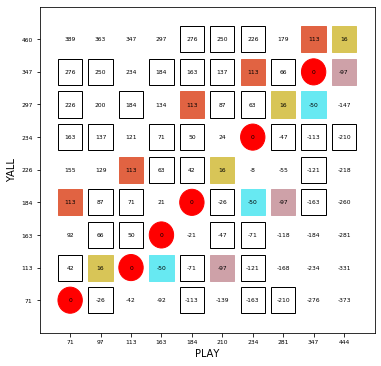

In [71]:
SpectralConvolution('PLAY', "YALL")